In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

*Exploratory Analysis on Timing Variability Among Different Styles*

In this section, we embark on a multifaceted exploration of timing variability among various musical styles present in our dataset. Our endeavor encompasses a systematic investigation, progressing through successive levels of inquiry to unravel the intricate nuances of timing expression within different compositional and performance contexts.

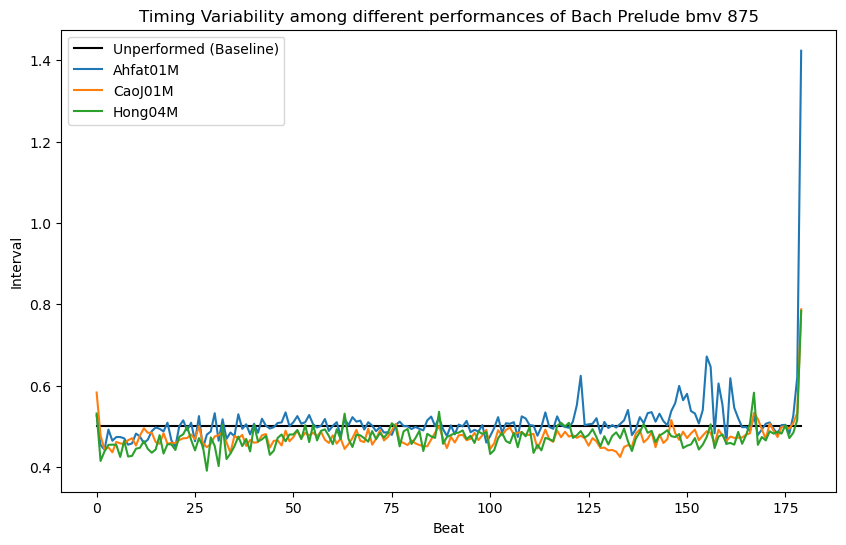

In [49]:
def read_annotations(file_path):
    with open(file_path, 'r') as file:
        data = np.loadtxt(file, usecols=(0,))
        return data

def calculate_timing_intervals(annotations):
    return np.diff(annotations)

def visualize_timing_variations(unperformed_annotations, performed_annotations, performers):
    unperformed_intervals = calculate_timing_intervals(unperformed_annotations)

    plt.figure(figsize=(10, 6))
    plt.plot(unperformed_intervals, label='Unperformed (Baseline)', color='black')

    for i, performed in enumerate(performed_annotations):
        performed_intervals = calculate_timing_intervals(performed)
        plt.plot(performed_intervals, label=performers[i])

    plt.xlabel('Beat')
    plt.ylabel('Interval')
    plt.title('Timing Variability among different performances of Bach Prelude bmv 875')
    plt.legend()
    plt.show()


def main():

    unperformed_path = "Data/Bach/Prelude/bwv_875/midi_score_annotations.txt"
    performer_paths = [
        ("Data/Bach/Prelude/bwv_875/Ahfat01M_annotations.txt"),
        ("Data/Bach/Prelude/bwv_875/CaoJ01M_annotations.txt"),
        ("Data/Bach/Prelude/bwv_875/Hong04M_annotations.txt")
    ]
    performers = ["Ahfat01M", "CaoJ01M", "Hong04M"]


    unperformed_annotations = read_annotations(unperformed_path)
    performed_annotations = [read_annotations(path) for path in performer_paths]


    visualize_timing_variations(unperformed_annotations, performed_annotations, performers)

if __name__ == "__main__":
    main()


**Initial Probe into Performers' Styles:**

Our analysis commences with a focused examination of timing variability exhibited by different performers in their renditions of a single musical piece. By scrutinizing multiple performances of Bach's Prelude "bwv_875": "Ahfat01M", "CaoJ01M", and "Hong04M", there are several findings:

a) At the very first note/beat, all the performers took slightly longer time than the unperformed scores specifies, and this also applies (even more dramatically) to the last note/beat;

b) The "CaoJ01M" and "Hong04M" performances tend to be have a faster pace throughout the piece, as indicated by the orange line and the red line that basically stay below the black baseline;

c) By contrast, the "Ahfat01M" performance shows more volatility, with the blue line fluctuating either above the baseline (especially from beat 120 to 170) or below it.


Timing Variability within Fugue:
Number of pieces: 84
Mean standard deviation: 11.996101441018048
Median standard deviation: 9.417697769749145

Timing Variability within Prelude:
Number of pieces: 82
Mean standard deviation: 10.56261858504478
Median standard deviation: 6.9559624069765285
T-test Results:
t-statistic: 0.9557788997705
p-value: 0.3405906966290486
There is no statistically significant difference in timing variability.


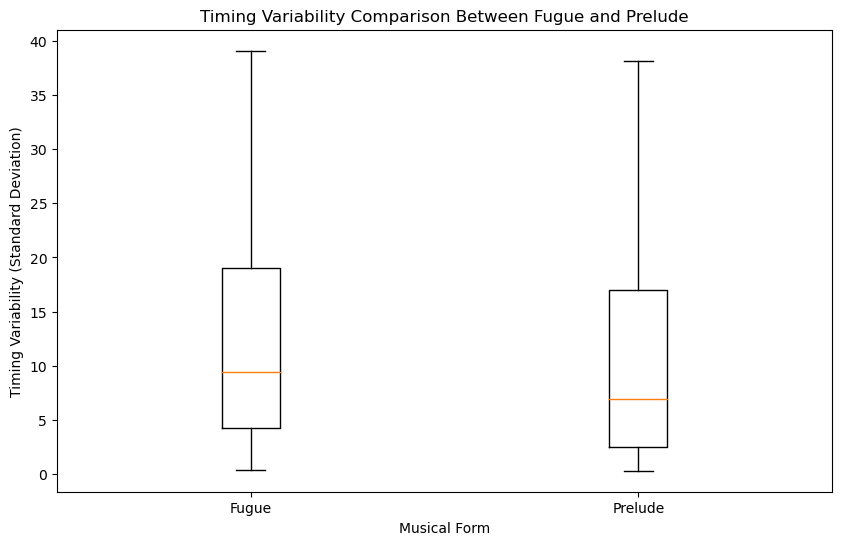

In [60]:
def perform_t_test(a_variability, b_variability):
    t_statistic, p_value = ttest_ind(a_variability, b_variability)
    return t_statistic, p_value

def calculate_timing_deviations(unperformed, performed):
    if len(unperformed) != len(performed):
        return [0]  # Skip this pair if lengths are different
    return performed - unperformed

def calculate_standard_deviation(deviations):
    if len(deviations)==1:
        return -1
    else:
        return np.std(deviations)

def measure_genre_variability(genre_folder):
    pieces = os.listdir(genre_folder)
    timing_variability = []

    for piece in pieces:
        piece_folder = os.path.join(genre_folder, piece)
        unperformed_path = os.path.join(piece_folder, 'midi_score_annotations.txt')
        unperformed_annotations = read_annotations(unperformed_path)
        
        performed_files = [f for f in os.listdir(piece_folder) if f.endswith('_annotations.txt') and not f.startswith('midi_score')]
        for performed_file in performed_files:
            performed_path = os.path.join(piece_folder, performed_file)
            performed_annotations = read_annotations(performed_path)
            
            deviations = calculate_timing_deviations(unperformed_annotations, performed_annotations)
            std_deviation = calculate_standard_deviation(deviations)
            timing_variability.append(std_deviation)

    return timing_variability

def visualize_genre_variability(fugue_variability, prelude_variability):
    plt.figure(figsize=(10, 6))
    plt.boxplot([fugue_variability, prelude_variability], labels=['Fugue', 'Prelude'])
    plt.xlabel('Musical Form')
    plt.ylabel('Timing Variability (Standard Deviation)')
    plt.title('Timing Variability Comparison Between Fugue and Prelude')
    plt.show()

def interpret_t_test(p_value, alpha=0.05):
    if p_value < alpha:
        print("The difference in timing variability is statistically significant.")
    else:
        print("There is no statistically significant difference in timing variability.")

def main():
    fugue_folder = "Data/Bach/Fugue"
    prelude_folder = "Data/Bach/Prelude"

    fugue_variability = measure_genre_variability(fugue_folder)
    prelude_variability = measure_genre_variability(prelude_folder)

    print("Timing Variability within Fugue:")
    print(f"Number of pieces: {len(fugue_variability)}")
    print(f"Mean standard deviation: {np.mean(fugue_variability)}")
    print(f"Median standard deviation: {np.median(fugue_variability)}")

    print("\nTiming Variability within Prelude:")
    print(f"Number of pieces: {len(prelude_variability)}")
    print(f"Mean standard deviation: {np.mean(prelude_variability)}")
    print(f"Median standard deviation: {np.median(prelude_variability)}")

    t_statistic, p_value = perform_t_test(fugue_variability, prelude_variability)

    print("T-test Results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    interpret_t_test(p_value)

    visualize_genre_variability(fugue_variability, prelude_variability)

if __name__ == "__main__":
    main()


**Intra-Composer Comparison: Prelude vs. Fugue by Bach:**

Building upon our initial insights, we delve deeper into the repertoire of a single composer, Johann Sebastian Bach. Specifically, we conduct a comparative analysis of timing variability between Bach's preludes and fugues. By juxtaposing these two distinct genres within Bach's oeuvre, we seek to ascertain whether compositional differences influence timing characteristics, thereby shedding light on the interplay between musical form and expressive timing. However, after statistical investigation, no statistically significant difference in timing variability was found between Bach's Fugue and Prelude.

Timing Variability within Bach:
Number of pieces: 169
Mean standard deviation: 11.575418786666772
Median standard deviation: 8.507678260884084

Timing Variability within Beethoven:
Number of pieces: 259
Mean standard deviation: 9.291764210114424
Median standard deviation: 6.641968671661364

Timing Variability within Chopin:
Number of pieces: 285
Mean standard deviation: 12.892856887222575
Median standard deviation: 5.184278952057667

Timing Variability within Liszt:
Number of pieces: 117
Mean standard deviation: 28.535435869528325
Median standard deviation: 20.33753910148408

Timing Variability within Schubert:
Number of pieces: 59
Mean standard deviation: 34.80653738424506
Median standard deviation: 35.61160475518889
ANOVA Test Results:
F-statistic: 36.34312226923464
p-value: 3.7762884312542153e-28
The difference in timing variability among Bach, Beethoven, Chopin, and Liszt styles is statistically significant.


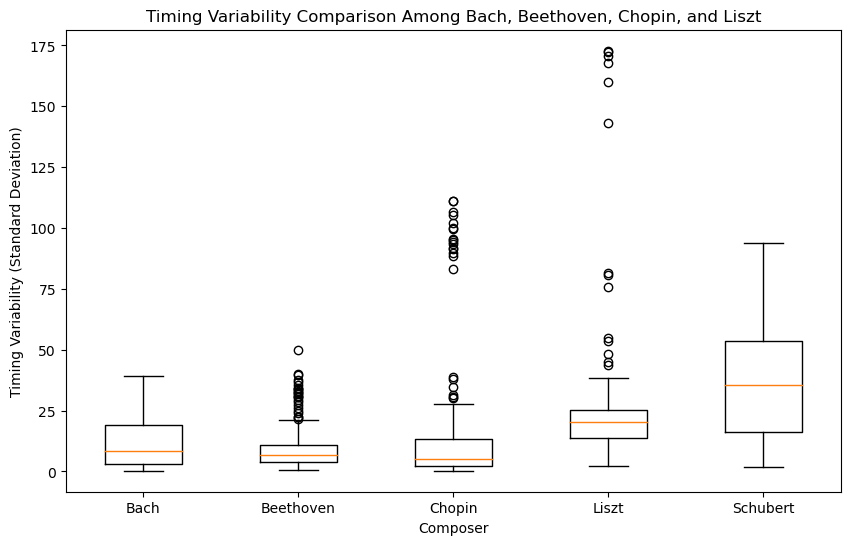

In [59]:
def measure_composer_variability(style_folder):
    pieces = []
    for root, dirs, files in os.walk(style_folder):
        for file in files:
            if file.endswith("midi_score_annotations.txt"):
                unperformed_path = os.path.join(root, file)
                unperformed_annotations = read_annotations(unperformed_path)
                
                performed_files = [f for f in files if f.endswith('_annotations.txt') and not f.startswith('midi_score')]
                for performed_file in performed_files:
                    performed_path = os.path.join(root, performed_file)
                    performed_annotations = read_annotations(performed_path)
                    
                    deviations = calculate_timing_deviations(unperformed_annotations, performed_annotations)
                    piece_std_deviation = calculate_standard_deviation(deviations)
                    if piece_std_deviation >= 0:
                        pieces.append(piece_std_deviation)
                    
    return pieces

def perform_anova_test(bach_variability, beethoven_variability, chopin_variability, liszt_variability, schubert_variability):
    f_statistic, p_value = f_oneway(bach_variability, beethoven_variability, chopin_variability, liszt_variability, schubert_variability)
    return f_statistic, p_value

def interpret_anova_test(p_value, alpha=0.05):
    if p_value < alpha:
        print("The difference in timing variability among Bach, Beethoven, Chopin, and Liszt styles is statistically significant.")
    else:
        print("There is no statistically significant difference in timing variability among Bach, Beethoven, Chopin, and Liszt styles.")

def visualize_composer_variability(composers_variability):
    plt.figure(figsize=(10, 6))
    plt.boxplot(composers_variability.values(), labels=composers_variability.keys())
    plt.xlabel('Composer')
    plt.ylabel('Timing Variability (Standard Deviation)')
    plt.title('Timing Variability Comparison Among Bach, Beethoven, Chopin, and Liszt')
    plt.show()

def main():
    composers_folders = ["Data/Bach", "Data/Beethoven", "Data/Chopin", "Data/Liszt", "Data/Schubert"]
    composers_variability = {}

    for composer_folder in composers_folders:
        composer_name = os.path.basename(composer_folder)
        composer_variability = measure_composer_variability(composer_folder)
        composers_variability[composer_name] = composer_variability

    bach_variability = composers_variability["Bach"]
    beethoven_variability = composers_variability["Beethoven"]
    chopin_variability = composers_variability["Chopin"]
    liszt_variability = composers_variability["Liszt"]
    schubert_variability = composers_variability["Schubert"]

    print("Timing Variability within Bach:")
    print(f"Number of pieces: {len(bach_variability)}")
    print(f"Mean standard deviation: {np.mean(bach_variability)}")
    print(f"Median standard deviation: {np.median(bach_variability)}")

    print("\nTiming Variability within Beethoven:")
    print(f"Number of pieces: {len(beethoven_variability)}")
    print(f"Mean standard deviation: {np.mean(beethoven_variability)}")
    print(f"Median standard deviation: {np.median(beethoven_variability)}")

    print("\nTiming Variability within Chopin:")
    print(f"Number of pieces: {len(chopin_variability)}")
    print(f"Mean standard deviation: {np.mean(chopin_variability)}")
    print(f"Median standard deviation: {np.median(chopin_variability)}")

    print("\nTiming Variability within Liszt:")
    print(f"Number of pieces: {len(liszt_variability)}")
    print(f"Mean standard deviation: {np.mean(liszt_variability)}")
    print(f"Median standard deviation: {np.median(liszt_variability)}")

    print("\nTiming Variability within Schubert:")
    print(f"Number of pieces: {len(schubert_variability)}")
    print(f"Mean standard deviation: {np.mean(schubert_variability)}")
    print(f"Median standard deviation: {np.median(schubert_variability)}")


    f_statistic, p_value = perform_anova_test(bach_variability, beethoven_variability, chopin_variability, liszt_variability, schubert_variability)

    print("ANOVA Test Results:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    interpret_anova_test(p_value)

    # Visualize the distribution of timing variability
    visualize_composer_variability(composers_variability)

if __name__ == "__main__":
    main()


**Inter-Composer Examination: Unraveling Systematic Differences:**

Our exploration culminates in a comprehensive examination of timing variability across a diverse array of composers, transcending the confines of individual performers and genres. We expand our purview to include renowned composers such as Beethoven, Chopin, Liszt and Schubert (all of whom have more than 50 midi performances in the dataset) with the aim of discerning any systematic variations in timing expression across different musical styles. Through meticulous analysis and comparison, we endeavor to elucidate the unique temporal signatures associated with each composer, thereby enriching our understanding of musical interpretation and expression.
As we can see from the plot above,

a) Performances of Schubert, among the five composers, display the highest and widest range of variability;

b) While performances of Liszt, have the second highest in terms of mean score of standard deviation;

c) There are notable outliers in performances of Beethoven, Chopin and Liszt: for Beethoven, the outliers are distributed more tightly from roughly 20 to 50; for Chopin, they mainly fall in two main intervals [30, 40] and [80, 120] or so; for Liszt, the outliers are higher more scattered.